2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Epoch 10/100, Discriminator Loss: [0.6540612  0.66029096], Generator Loss: [array(0.6536201, dtype=float32), array(0.66041666, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━

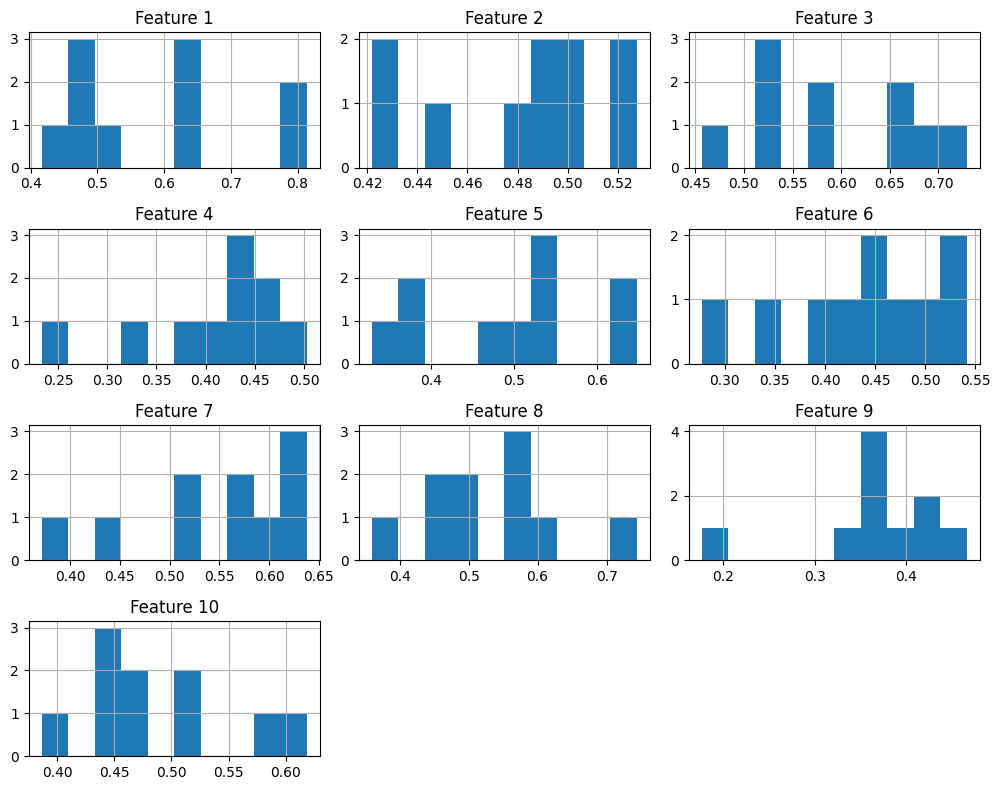

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

# Define the GANBLR++ model
class GANBLRPlusPlus:
    def __init__(self, input_dim, latent_dim):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.generator = self.build_generator()
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

    def build_generator(self):
        model = models.Sequential()
        model.add(layers.Input(shape=(self.latent_dim,)))
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dense(self.input_dim, activation='sigmoid'))
        return model

    def build_discriminator(self):
        model = models.Sequential()
        model.add(layers.Input(shape=(self.input_dim,)))
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dense(1, activation='sigmoid'))
        return model

    def train(self, data, epochs=100, batch_size=32):
        for epoch in range(epochs):
            # Generate fake data
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            generated_data = self.generator.predict(noise)

            # Labels
            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            # Train discriminator
            real_loss = self.discriminator.train_on_batch(data[:batch_size], real_labels)
            fake_loss = self.discriminator.train_on_batch(generated_data, fake_labels)
            d_loss = 0.5 * np.add(real_loss, fake_loss)

            # Train generator
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            g_loss = self.discriminator.train_on_batch(
                self.generator.predict(noise),
                real_labels
            )

            # Log the losses
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}")

# Generate some synthetic data
def generate_synthetic_data():
    real_data = np.random.rand(1000, 10)  # Randomly generated real data
    gan = GANBLRPlusPlus(input_dim=10, latent_dim=20)
    gan.train(real_data, epochs=100, batch_size=64)

    # Generate synthetic data
    noise = np.random.normal(0, 1, (10, gan.latent_dim))
    synthetic_data = gan.generator.predict(noise)
    return synthetic_data

if __name__ == "__main__":
    synthetic_data = generate_synthetic_data()

    # Display the synthetic data
    synthetic_df = pd.DataFrame(synthetic_data, columns=[f"Feature {i+1}" for i in range(synthetic_data.shape[1])])
    print(synthetic_df.head())

    # Visualize synthetic data distribution
    synthetic_df.hist(figsize=(10, 8))
    plt.tight_layout()
    plt.show()
